### Imports

In [18]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import ToktokTokenizer
from nltk.stem import PorterStemmer
import unicodedata
import nltk
import re
import spacy
import sys
from preprocessing import NLPPipe
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

Load article dataframe, document term matrix, and nlp pipeline

In [19]:
df = pickle.load(open("/Users/vinnythompson/Documents/Metis/project4/clean_df2.p", "rb"))
dtm = pickle.load(open("/Users/vinnythompson/Documents/Metis/project4/dtm2.p", "rb"))

In [20]:
nlp = NLPPipe()
nlp.load_pipe('/Users/vinnythompson/Documents/Metis/project4/pipeline2.mdl')

Define function to display top words for each topic

In [21]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

Create instance of NMF model

In [22]:
nmf_model = NMF(25, random_state=2)

In [23]:
doc_topic = nmf_model.fit_transform(dtm)

/Users/vinnythompson/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


### Display top 30 words for each topic

In [24]:
names = ['Neuroscience/ Behavioral Sci.', 
                        'International Affairs', 
                        'Astronomy', 
                        'Academia', 
                        'Climate Science', 
                        'Diseases/ Epidemics/ Viruses',
                        'Optics/ Electronics/ Photonics/ Device Physics', 
                        'Publication-specific News', 
                        'Drug Discovery/ Pharmaceuticals', 
                        '?',
                        'Research/ Funding/ Grants', 
                        'Genetics/Genomics', 
                        'Ocean Sciences/ Geology', 
                        'Government/ Policy', 
                        'Stem Cells/ Cloning', 
                        'Agriculture/ Plant Sciences', 
                        '??', 
                        'Cellular Bio./ Molecular Bio.', 
                        'Evolution/ Archaeology', 
                        'Phyics/ Particle Physics/ Quantum Physics',
                        'Scientific Commmunity/ Conferences/ Symposiums', 
                        'Space Travel/ Exploration', 
                        'Wildlife/ Conservation/ Biodiversity', 
                        'Planetary Science/ Solar System', 
                        'Conferences/ Symposiums'
                                   ]

In [25]:
display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30, names)


Topic: ' Neuroscience/ Behavioral Sci. '
brain, people, study, university, one, researcher, effect, woman, might, behaviour, result, found, neuroscientist, memory, whether, child, activity, different, team, colleague, neuron, suggests, show, time, difference, finding, also, even, human, test

Topic: ' International Affairs '
country, united, international, european, nation, state, commission, union, government, eu, agreement, europe, meeting, minister, world, member, organization, said, last, conference, political, would, china, policy, week, india, developing, programme, agreed, scientist

Topic: ' Astronomy '
star, astronomer, telescope, galaxy, light, observatory, universe, planet, object, sun, earth, observation, sky, space, solar, black, gravitational, distant, astronomical, hole, mass, astronomy, orbit, time, supernova, milky, cosmic, dark, radio, hubble

Topic: ' Academia '
dr, prof, college, university, appointed, professor, lecturer, appointment, chemistry, department, chair,

Create doc-topic matrix

In [31]:
H = pd.DataFrame(doc_topic.round(5),
             index = df.title.values,
             columns = ['Neuroscience/ Behavioral Sci.', 
                        'International Affairs', 
                        'Astronomy', 
                        'Academia', 
                        'Climate Science', 
                        'Diseases/ Epidemics/ Viruses',
                        'Optics/ Electronics/ Photonics/ Device Physics', 
                        'Publication-specific News', 
                        'Drug Discovery/ Pharmaceuticals', 
                        '?',
                        'Research/ Funding/ Grants', 
                        'Genetics/Genomics', 
                        'Ocean Sciences/ Geology', 
                        'Government/ Policy', 
                        'Stem Cells/ Cloning', 
                        'Agriculture/ Plant Sciences', 
                        '??', 
                        'Cellular Bio./ Molecular Bio.', 
                        'Evolution/ Archaeology', 
                        'Phyics/ Particle Physics/ Quantum Physics',
                        'Scientific Commmunity/ Conferences/ Symposiums', 
                        'Space Travel/ Exploration', 
                        'Wildlife/ Conservation/ Biodiversity', 
                        'Planetary Science/ Solar System', 
                        'Conferences/ Symposiums'
                                   ])

,Neuroscience/ Behavioral Sci.,International Affairs,Astronomy,Academia,Climate Science,Diseases/ Epidemics/ Viruses,Optics/ Electronics/ Photonics/ Device Physics,Publication-specific News,Drug Discovery/ Pharmaceuticals,?,...,Agriculture/ Plant Sciences,??,Cellular Bio./ Molecular Bio.,Evolution/ Archaeology,Phyics/ Particle Physics/ Quantum Physics,Scientific Commmunity/ Conferences/ Symposiums,Space Travel/ Exploration,Wildlife/ Conservation/ Biodiversity,Planetary Science/ Solar System,Conferences/ Symposiums
Military Strategy: Balanced Powers,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
Dark days for NASA,0.00121,0.00286,0.00000,0.00000,0.00000,0.00016,0.00707,0.00485,0.00000,0.0,...,0.00224,0.00219,0.00055,0.00000,0.00000,0.00000,0.06912,0.00305,0.00000,0.0
Methane threat to drinking water,0.00200,0.00000,0.00217,0.00308,0.02266,0.00000,0.00801,0.00370,0.00101,0.0,...,0.01424,0.00150,0.00463,0.00393,0.00172,0.00000,0.00000,0.00333,0.00000,0.0
US on track for stabilization,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
Royal Geographical Society: Awards for 1945-46,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.11097,0.00000,0.00000,0.00000,0.0
Centenary of the Former Scottish Meteorological Society,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
NASA devolves control of Cassini observations to research teams,0.00094,0.00151,0.00688,0.00014,0.00000,0.00000,0.00899,0.00000,0.00000,0.0,...,0.00000,0.00000,0.00169,0.00000,0.00139,0.00000,0.09601,0.00000,0.03962,0.0
Ecologists score victory over controversial dyke project,0.00000,0.00613,0.00000,0.00189,0.00178,0.00000,0.00000,0.00000,0.00000,0.0,...,0.02664,0.00000,0.00345,0.00000,0.00000,0.00000,0.00000,0.02787,0.00000,0.0
"Coronavirus can infect cats — dogs, not so much",0.00468,0.00000,0.00000,0.00000,0.00000,0.08927,0.00000,0.00772,0.00000,0.0,...,0.00000,0.00000,0.00860,0.00000,0.00858,0.00000,0.00000,0.01071,0.00000,0.0
US science foundation gets the go-ahead for more centres,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0


Get rid of uninformative topics

In [32]:
H.drop(columns=['Academia', '?', '??', 'Publication-specific News', 'Scientific Commmunity/ Conferences/ Symposiums'], inplace=True)

Assign closest topic for each document

In [34]:
maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

In [14]:
doc_topic = H[H['closest_topic'] != 'None']

In [27]:
topic_df = pd.concat([df, doc_topic], axis=1)
topic_df = topic_df[topic_df['closest_topic'].notnull()]

In [41]:
topics = ['Neuroscience/ Behavioral Sci.', 'International Affairs', 'Astronomy',
       'Climate Science', 'Diseases/ Epidemics/ Viruses',
       'Optics/ Electronics/ Photonics/ Device Physics',
       'Drug Discovery/ Pharmaceuticals', 'Research/ Funding/ Grants',
       'Genetics/Genomics', 'Ocean Sciences/ Geology', 'Government/ Policy',
       'Stem Cells/ Cloning', 'Agriculture/ Plant Sciences',
       'Cellular Bio./ Molecular Bio.', 'Evolution/ Archaeology',
       'Phyics/ Particle Physics/ Quantum Physics',
       'Space Travel/ Exploration', 'Wildlife/ Conservation/ Biodiversity',
       'Planetary Science/ Solar System', 'Conferences/ Symposiums']

Add column for documents that may belong to more than 1 topic

In [73]:
article_topics = []
for i in topic_df.index:
    topic_list = []
    for topic in topics:
        if topic_df.loc[i, topic] > 0.01 or topic_df.loc[i, topic] == maxes[i]:
            topic_list.append(topic)
    article_topics.append(topic_list)

In [76]:
topic_df['all_topics'] = article_topics

Function for plotting topic frequency over time

In [117]:
import matplotlib.pyplot as plt
def plot_topic_timeline(topic):
    fig, ax = plt.subplots(figsize=(12,8))
    year_list = []
    article_list = []
    for i in range(1998, 2021):
        for j in range(1, 13):
            df_date = topic_df[(topic_df['year'] == i)]
            
            year_list.append(i)
            if len(df_date) < 10:
                article_list.append(0)
            else:
                mask = df_date.all_topics.apply(lambda x: any(item for item in [topic] if item in x))
                df_subset = df_date[mask]
                article_list.append(len(df_subset)/len(df_date))
                

            
#             if len(topic_df[(topic_df['year'] == i) & (topic_df['month'] == j)]) > 0:
#                 mask = topic_df.all_topics.apply(lambda x: any(item for item in [topic] if item in x))
#                 df_subset = topic_df[mask]

#                 if len(topic_df[topic_df['year_month'] ==i]) < 20:
#                     article_list.append(0)
#                 else:
#                     article_list.append(len(df_subset[df_subset['year_month'] == i])/len(topic_df[topic_df['year_month'] == i]))
    print(len(year_list), len(article_list))
    ax.plot(year_list, article_list)
    ax.set_title(f"Topic: {topic}", fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Topic Frequency (Fraction of Total)', fontsize=14)

276 276


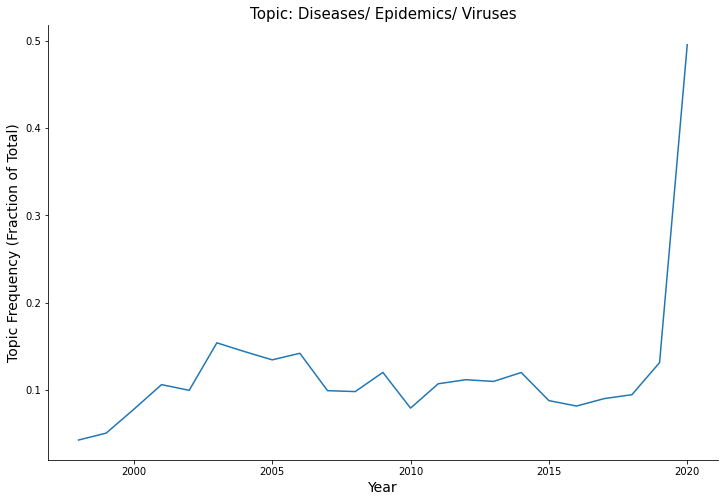

In [120]:
plot_topic_timeline(topics[4])

Save topic_df

In [212]:
import pickle
pickle.dump(topic_df, open('topic_df', 'wb'))

In [9]:
topic_names = ['Neuroscience/ Behavioral Sci.', 
                        'International Affairs', 
                        'Astronomy', 
                        'Climate Science', 
                        'Diseases/ Epidemics/ Viruses',
                        'Optics/ Electronics/ Photonics/ Device Physics', 
                        'Drug Discovery/ Pharmaceuticals', 
                        'Research/ Funding/ Grants', 
                        'Genetics/Genomics', 
                        'Ocean Sciences/ Geology', 
                        'Government/ Policy', 
                        'Stem Cells/ Cloning', 
                        'Agriculture/ Plant Sciences', 
                        'Cellular Bio./ Molecular Bio.', 
                        'Evolution/ Archaeology', 
                        'Phyics/ Particle Physics/ Quantum Physics',
                        'Space Travel/ Exploration', 
                        'Wildlife/ Conservation/ Biodiversity', 
                        'Planetary Science/ Solar System', 
                        'Conferences/ Symposiums'
]

Get dicts of top words in each topic 

In [10]:
feature_names = nlp.vectorizer.get_feature_names()
topic_dicts = []
no_top_words = 30
for ix, topic in enumerate(nmf_model.components_):
    topic_dict = {}
    for i in topic.argsort()[:-no_top_words - 1:-1]:
        topic_dict[nlp.vectorizer.get_feature_names()[i]] = topic[i]
    topic_dicts.append(topic_dict)                  

Plot wordclouds for each topic

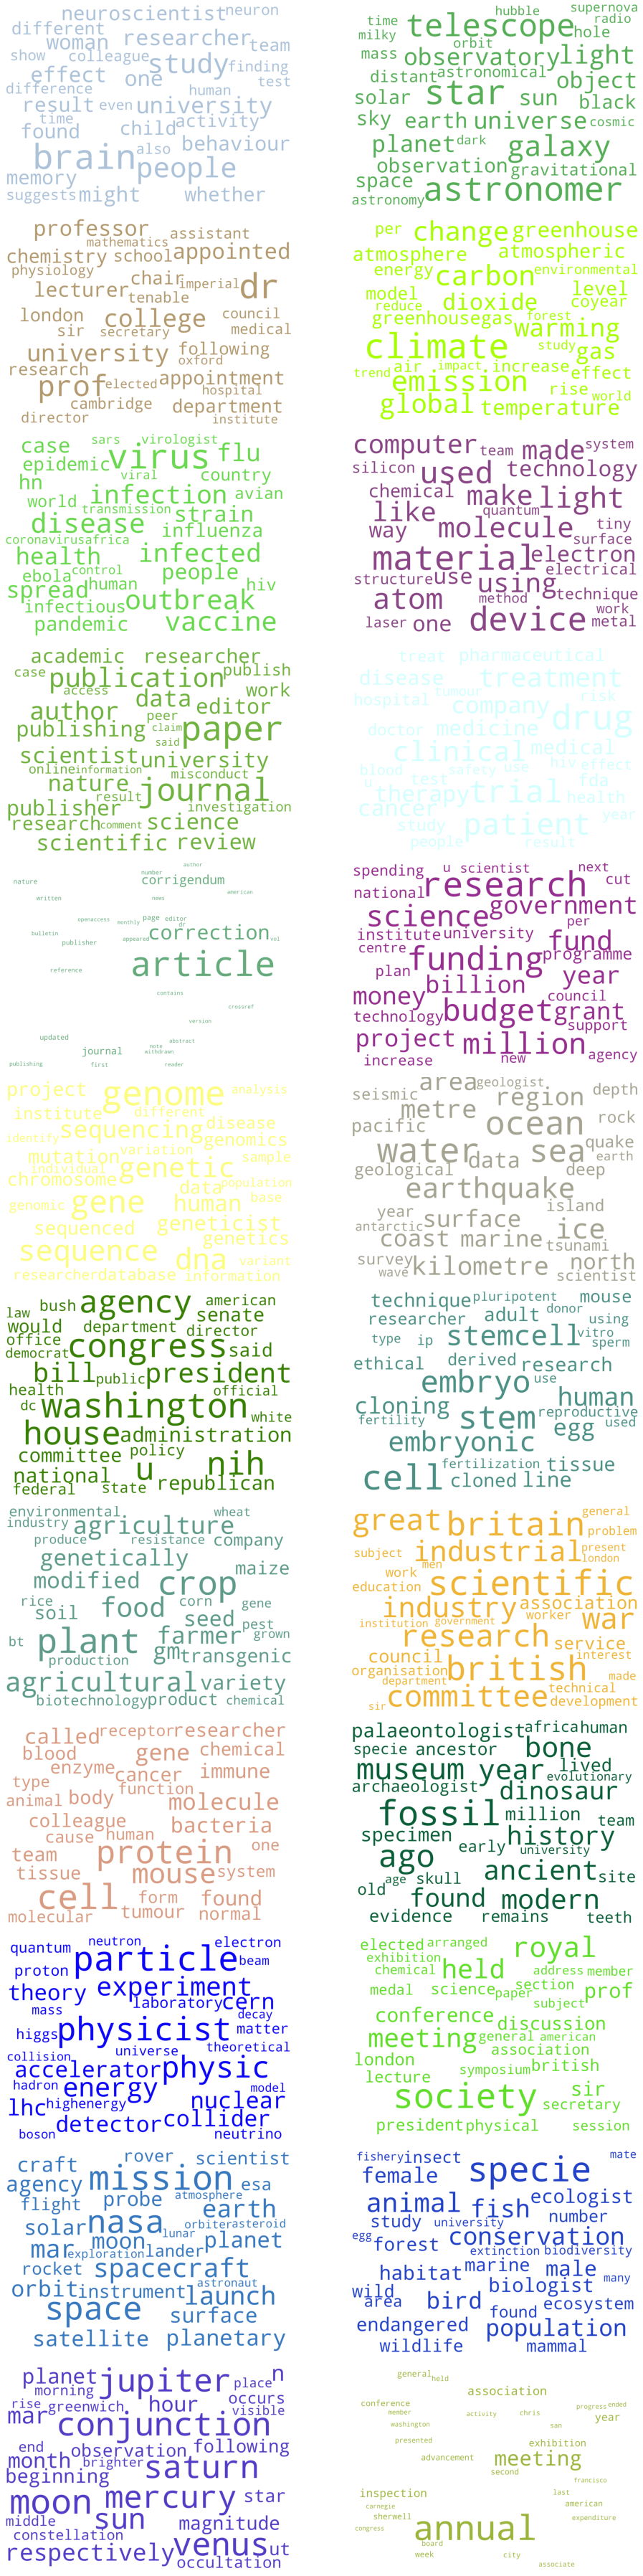

In [15]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=None,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


fig, axes = plt.subplots(12, 2, figsize=(15,50), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = topic_dicts[i]


    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(f'Topic: {topic_names[i]}', fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()